In [133]:
import pandas as pd
import umap
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import PredefinedSplit, GridSearchCV
from hypopt import GridSearch

from umap import UMAP

In [134]:
model_path = "/neurospin/dico/jchavas/Runs/70_self-supervised_two-regions/Output/ORBITAL_BT/20-56-02_1"
ukb_emb_file = f"{model_path}/ukb_random_embeddings/full_embeddings.csv"
schiz_emb_file = f"{model_path}/schiz_extended_random_embeddings/full_embeddings.csv"
schiz_path = "/neurospin/dico/data/deep_folding/current/datasets/schiz_extended"
schiz_label_file = f"{schiz_path}/used_schiz_subjects.csv"
train_file = f"{schiz_path}/train_subjects.csv"
val_file = f"{schiz_path}/val_subjects.csv"
test_intra_file = f"{schiz_path}/test_intra_subjects.csv"
test_file = f"{schiz_path}/test_subjects.csv"
precatatoes_file = "/neurospin/dico/data/bv_databases/human/partially_labeled/orbital_patterns/PreCatatoes/OFC_sulcal_type_data_186-subjects_only-schiz-and-control.csv"

In [135]:
ukb_emb = pd.read_csv(ukb_emb_file, index_col=0)
ukb_emb

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1000021,-0.223268,-1.910213,-4.233976,23.503736,11.443585,8.791657,-19.330896,9.398713,12.036551,20.609098,...,17.275707,19.637380,23.902270,6.220823,-1.704380,8.290183,-10.330559,1.080888,10.457481,-3.583808
sub-1000458,-1.487145,-11.373998,22.498978,12.430387,13.282054,6.232186,-9.554647,11.808377,11.785677,-1.828716,...,10.948754,3.683073,13.204277,3.243385,2.440976,-21.187466,-19.015520,-8.354998,-5.511058,14.558917
sub-1000575,6.581354,1.730981,23.259293,-16.387560,-1.729303,-7.419610,12.355750,-17.623606,4.551756,18.279514,...,16.038273,21.737465,-6.228678,23.004549,15.599153,14.835086,20.791817,-9.450769,16.728659,3.886695
sub-1000606,-10.529222,-0.987313,27.112442,7.748507,12.663799,-8.886915,21.285873,5.773342,-0.787316,6.343807,...,-2.380115,6.828644,20.211292,5.759085,5.581007,-3.729945,-23.506893,1.081652,18.528513,-3.506488
sub-1000963,-1.465720,3.356936,18.716183,13.292232,-8.116371,3.039847,-8.254723,27.690653,5.612602,23.423693,...,6.647476,9.744260,33.864700,-0.016434,11.216681,-15.389115,-19.265200,11.988581,2.000807,-2.332965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-6023469,2.878745,-4.253128,17.483282,-4.064491,-13.859284,-1.935637,13.345888,7.350535,20.608257,0.863736,...,3.249543,21.022793,-5.036903,0.574743,6.367704,34.204155,6.475176,3.726127,13.607699,9.167556
sub-6023808,7.852437,-10.590528,16.383102,-8.025912,-5.520872,-6.413332,18.045626,-7.885871,26.925823,-10.883697,...,9.270588,10.658528,-16.836027,8.665563,13.203258,16.137606,2.157325,-17.735548,18.451640,7.117024
sub-6023847,13.306204,-10.247489,15.500339,18.971727,9.477009,10.342031,-0.777918,12.333806,8.913639,8.128776,...,25.283250,40.150448,13.482981,-0.217624,-1.209999,11.226042,-17.846478,11.902345,10.950462,4.230294


In [136]:
schiz_emb = pd.read_csv(schiz_emb_file, index_col=0)
schiz_emb

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
1,-3.072455,2.118755,14.767071,25.323727,-1.895218,-11.848566,-2.848450,0.804875,10.158325,8.894309,...,-10.301551,8.681802,-5.134368,8.642966,-4.594979,-11.185109,-7.091903,16.353384,15.851475,8.768789
10,-6.363084,8.495188,13.130330,15.011291,-1.502464,-11.951797,4.895388,-6.296835,8.275889,7.314315,...,-19.242125,3.129575,-10.291954,13.815314,-6.564233,-5.306970,-3.126764,15.064628,17.567493,5.550489
101,-8.257000,3.193301,15.231000,20.250187,2.875174,-9.162669,-0.456581,-4.579922,9.040375,10.708309,...,-13.839887,4.902569,-8.907161,15.914965,-8.117872,-11.600168,-7.630724,15.217825,13.910052,7.521028
102,0.839718,-1.255594,17.830366,14.800897,20.497416,0.962200,-12.739301,11.242928,-3.308038,9.281855,...,4.957207,30.968160,21.090038,-0.712377,-6.535363,0.837732,-14.335162,-6.496050,0.912047,1.447410
103,-2.120831,2.042139,14.197330,17.241810,0.429853,-6.865176,-15.585414,10.616910,9.235665,13.542730,...,-1.268514,9.333933,23.334452,14.609701,1.738005,-14.977012,-16.420273,-2.136248,14.604097,-12.011323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-st110288_ses-v1,8.529251,-4.346621,12.679420,-9.625874,-3.822075,2.099112,6.923754,-8.144130,15.322812,-20.103388,...,3.814035,0.100980,-16.517189,23.651382,-4.204888,20.095995,2.357023,-1.322250,0.266107,-10.865107
sub-va110289_ses-v1,-1.912347,-10.012351,26.258290,-6.525228,0.222735,12.820898,9.364318,4.255577,13.618147,-14.356390,...,3.029812,10.666740,5.456002,10.903213,-8.129805,20.262196,-2.148044,-7.108914,11.137066,2.314561
sub-ye110322_ses-v1,4.421231,-10.174214,15.189058,12.169552,-4.649335,4.747655,-10.108396,7.855030,7.429811,4.654629,...,17.957844,15.705018,5.530549,6.932653,1.356405,-0.227434,-16.601837,-22.949583,2.911914,-3.222028


In [137]:
schiz_label = pd.read_csv(schiz_label_file, index_col=0)
schiz_label

,sex,age,diagnosis,study,site
participant_id,,,,,
sub-INV07WT2ZL3,M,29,control,BSNIP,Dallas
sub-INV0AL14J6U,M,43,schizophrenia,BSNIP,Dallas
sub-INV14XK7P6E,M,30,control,BSNIP,Dallas
sub-INV1HXNTXYF,F,18,control,BSNIP,Dallas
sub-INV1XCNF4J5,F,25,control,BSNIP,Dallas
...,...,...,...,...,...
182,M,53,schizophrenia,PreCatatoes,Sainte-Anne
183,F,19,schizophrenia,PreCatatoes,Sainte-Anne
184,M,26,control,PreCatatoes,Sainte-Anne


In [138]:
schiz_train = pd.read_csv(train_file, header=None)
schiz_val = pd.read_csv(val_file, header=None)
schiz_test_intra = pd.read_csv(test_intra_file, header=None)
schiz_test = pd.read_csv(test_file, header=None)
schiz_train

,0
0,sub-50033_ses-1
1,sub-CH7458a_ses-v1
2,sub-11066_ses-1
3,sub-INVM0H9UC11
4,sub-ESOC10066_ses-v1
...,...
898,sub-10674_ses-1
899,sub-ESOC10043_ses-v1
900,sub-INVHRLM2K0F
901,sub-NM1010_ses-v1


In [139]:
np.unique(schiz_label.diagnosis)

array(['control', 'schizophrenia'], dtype=object)

# UKBioBank

In [140]:
norm = ukb_emb.apply(np.linalg.norm, axis=1)
ukb_emb = ukb_emb.div(norm, axis=0)

In [141]:
ukb_emb

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1000021,-0.000829,-0.007090,-0.015714,0.087233,0.042472,0.032630,-0.071745,0.034883,0.044673,0.076489,...,0.064118,0.072883,0.088712,0.023088,-0.006326,0.030769,-0.038341,0.004012,0.038812,-0.013301
sub-1000458,-0.006364,-0.048674,0.096282,0.053194,0.056839,0.026670,-0.040888,0.050533,0.050435,-0.007826,...,0.046854,0.015761,0.056506,0.013880,0.010446,-0.090669,-0.081375,-0.035754,-0.023584,0.062303
sub-1000575,0.027890,0.007336,0.098568,-0.069447,-0.007328,-0.031443,0.052361,-0.074685,0.019289,0.077465,...,0.067967,0.092119,-0.026396,0.097488,0.066106,0.062868,0.088111,-0.040050,0.070893,0.016471
sub-1000606,-0.037521,-0.003518,0.096615,0.027612,0.045128,-0.031669,0.075852,0.020573,-0.002806,0.022606,...,-0.008482,0.024334,0.072023,0.020523,0.019888,-0.013292,-0.083767,0.003854,0.066026,-0.012495
sub-1000963,-0.005472,0.012532,0.069870,0.049622,-0.030300,0.011348,-0.030816,0.103373,0.020953,0.087444,...,0.024816,0.036377,0.126422,-0.000061,0.041873,-0.057450,-0.071920,0.044755,0.007469,-0.008709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-6023469,0.011373,-0.016803,0.069071,-0.016058,-0.054754,-0.007647,0.052725,0.029040,0.081417,0.003412,...,0.012838,0.083054,-0.019899,0.002271,0.025157,0.135130,0.025581,0.014721,0.053760,0.036218
sub-6023808,0.028954,-0.039050,0.060408,-0.029593,-0.020357,-0.023647,0.066538,-0.029077,0.099282,-0.040131,...,0.034183,0.039300,-0.062078,0.031952,0.048683,0.059503,0.007955,-0.065395,0.068035,0.026242
sub-6023847,0.055287,-0.042578,0.064403,0.078827,0.039377,0.042971,-0.003232,0.051246,0.037036,0.033775,...,0.105051,0.166823,0.056021,-0.000904,-0.005027,0.046644,-0.074151,0.049454,0.045499,0.017577


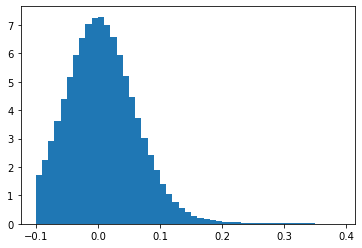

In [142]:
p = plt.hist(ukb_emb.values.ravel(), bins=np.arange(-0.1,0.4,0.01), density=True)

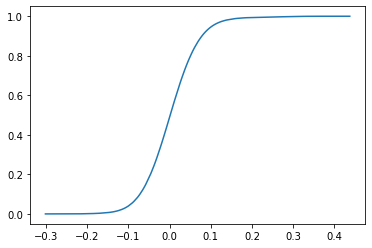

In [143]:
Z = ukb_emb.values.ravel()
N = len(Z)
X2 = np.sort(Z)
F2 = np.array(range(N))/float(N)

plt.plot(X2, F2)

In [144]:
X2[int(N*0.59)]

0.014449013397726217

In [145]:
len(ukb_emb)

21051

In [146]:
ukb_positive = (ukb_emb>0).sum(axis=0)/len(ukb_emb)
ukb_positive = ukb_positive.sort_values(ascending=False)

In [147]:
ukb_positive

dim132    1.000000
dim176    1.000000
dim110    0.989882
dim3      0.968648
dim192    0.903758
            ...   
dim226    0.175384
dim118    0.159090
dim66     0.139423
dim161    0.060947
dim204    0.000000
Length: 256, dtype: float64

In [148]:
ukb_positive[10:50]

dim40     0.862429
dim250    0.849936
dim100    0.844710
dim70     0.820436
dim28     0.803145
dim129    0.794072
dim107    0.793074
dim151    0.765759
dim246    0.758729
dim168    0.753076
dim152    0.747613
dim248    0.746378
dim162    0.744905
dim99     0.739490
dim239    0.738302
dim33     0.735119
dim101    0.726806
dim31     0.726189
dim93     0.724526
dim238    0.724289
dim128    0.720441
dim65     0.711510
dim125    0.697212
dim26     0.686476
dim123    0.684101
dim144    0.682010
dim198    0.681203
dim85     0.673650
dim91     0.668519
dim206    0.665954
dim138    0.665384
dim88     0.662391
dim157    0.656691
dim45     0.653793
dim24     0.651656
dim255    0.649185
dim73     0.646288
dim37     0.646240
dim193    0.644815
dim21     0.643865
dtype: float64

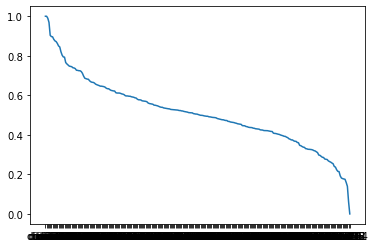

In [149]:
plt.plot(ukb_positive)

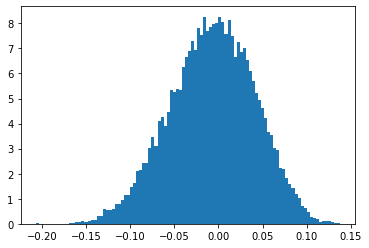

In [150]:
p = plt.hist(ukb_emb.loc[:,"dim83"], bins=100, density=True)

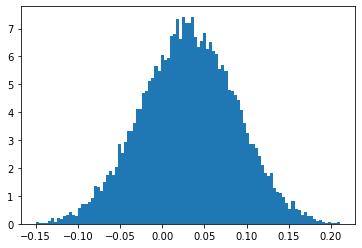

In [151]:
p = plt.hist(ukb_emb.loc[:,"dim65"], bins=100, density=True)

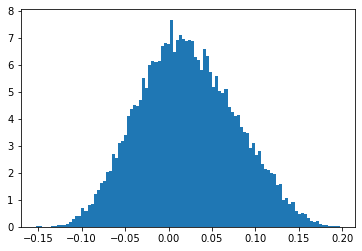

In [152]:
p = plt.hist(ukb_emb.loc[:,"dim188"], bins=100, density=True)

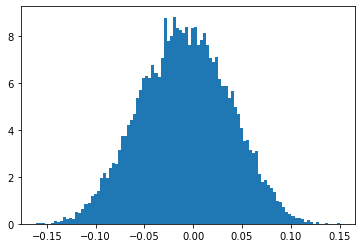

In [153]:
p = plt.hist(ukb_emb.loc[:,"dim10"], bins=100, density=True)

# Schizophrene

In [154]:
norm = schiz_emb.apply(np.linalg.norm, axis=1)
schiz_emb = schiz_emb.div(norm, axis=0)

In [155]:
def compute_umap(df, n_neighbors=15):
    # apply umap
    reducer = umap.UMAP(n_neighbors=n_neighbors)
    visual_embs = reducer.fit_transform(df)
    return visual_embs, reducer

In [156]:
visual_ukb_emb, reducer = compute_umap(ukb_emb, n_neighbors=15)

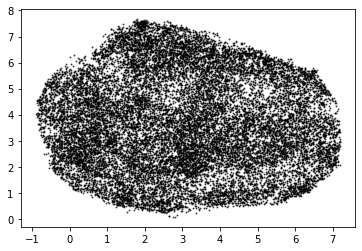

In [157]:
plt.scatter(visual_ukb_emb[:,0], visual_ukb_emb[:,1], c='black', s=1, alpha=0.6)

In [158]:
visual_schiz_emb = reducer.transform(schiz_emb)

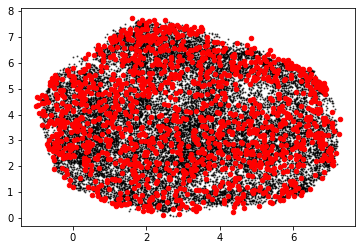

In [159]:
plt.scatter(visual_ukb_emb[:,0], visual_ukb_emb[:,1], c='black', s=1, alpha=0.6)
plt.scatter(visual_schiz_emb[:,0], visual_schiz_emb[:,1], c='red', s=20, alpha=1)

In [160]:
ukb_positive = (ukb_emb>0).sum(axis=0)/len(ukb_emb)

In [161]:
schiz_order = schiz_emb.copy()
schiz_order.loc["ukb_positive",:] = ukb_positive
schiz_order

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
1,-0.016111,0.011110,0.077433,0.132788,-0.009938,-0.062129,-0.014936,0.004220,0.053266,0.046638,...,-0.054017,0.045524,-0.026923,0.045320,-0.024094,-0.058650,-0.037187,0.085751,0.083119,0.045980
10,-0.035993,0.048053,0.074272,0.084912,-0.008499,-0.067605,0.027691,-0.035618,0.046813,0.041373,...,-0.108843,0.017702,-0.058217,0.078146,-0.037131,-0.030019,-0.017687,0.085213,0.099371,0.031396
101,-0.044550,0.017229,0.082178,0.109259,0.015513,-0.049437,-0.002463,-0.024711,0.048777,0.057776,...,-0.074673,0.026452,-0.048058,0.085869,-0.043800,-0.062588,-0.041171,0.082107,0.075051,0.040579
102,0.003805,-0.005690,0.080797,0.067069,0.092883,0.004360,-0.057727,0.050947,-0.014990,0.042060,...,0.022463,0.140330,0.095568,-0.003228,-0.029615,0.003796,-0.064959,-0.029436,0.004133,0.006559
103,-0.008424,0.008111,0.056390,0.068482,0.001707,-0.027267,-0.061903,0.042169,0.036683,0.053790,...,-0.005038,0.037073,0.092681,0.058028,0.006903,-0.059486,-0.065219,-0.008485,0.058005,-0.047707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-va110289_ses-v1,-0.007437,-0.038937,0.102115,-0.025376,0.000866,0.049859,0.036417,0.016549,0.052959,-0.055830,...,0.011783,0.041481,0.021218,0.042401,-0.031616,0.078797,-0.008353,-0.027646,0.043311,0.009001
sub-ye110322_ses-v1,0.017357,-0.039942,0.059630,0.047776,-0.018253,0.018639,-0.039684,0.030838,0.029168,0.018273,...,0.070500,0.061656,0.021712,0.027217,0.005325,-0.000893,-0.065176,-0.090097,0.011432,-0.012649
sub-yh100442_ses-v1,0.007208,-0.040631,0.101985,0.043886,0.050965,0.047544,0.044587,0.036942,0.038687,-0.070954,...,0.013734,0.006653,0.017375,-0.004459,0.013154,-0.047813,-0.096115,0.004286,0.016106,-0.010673


In [162]:
schiz_order = schiz_order.sort_values(schiz_order.last_valid_index(), ascending=False, axis=1)

In [163]:
schiz_order

,dim132,dim176,dim110,dim3,dim192,dim127,dim9,dim61,dim166,dim187,...,dim143,dim120,dim214,dim140,dim126,dim226,dim118,dim66,dim161,dim204
ID,,,,,,,,,,,,,,,,,,,,,
1,0.466831,0.250386,0.166441,0.077433,0.056779,0.078005,0.053266,0.080028,0.079794,0.040617,...,-0.056494,-0.010100,-0.072627,-0.030962,0.041325,0.039760,-0.062629,-0.022061,-0.179148,-0.198164
10,0.480474,0.285846,0.134385,0.074272,0.062047,0.048672,0.046813,0.074963,0.009320,0.002748,...,-0.054670,-0.036858,-0.112762,0.003417,0.033068,0.050722,-0.034062,-0.012260,-0.178091,-0.230339
101,0.470932,0.283674,0.157409,0.082178,0.095165,0.069908,0.048777,0.075913,0.022322,0.056073,...,-0.063596,-0.010447,-0.141266,-0.002947,0.003513,0.059597,-0.020318,-0.029633,-0.151539,-0.251464
102,0.326010,0.211388,0.062204,0.080797,0.054651,0.098153,-0.014990,-0.007452,0.140742,0.128715,...,-0.082191,0.016525,-0.017490,-0.042984,-0.070151,-0.078449,-0.029179,-0.045136,-0.007207,-0.211992
103,0.270430,0.202429,0.013162,0.056390,0.023427,0.070128,0.036683,-0.022247,0.147475,0.135022,...,-0.042793,-0.021182,-0.004964,0.066355,0.011150,-0.101814,0.026684,-0.052077,0.012459,-0.211608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-va110289_ses-v1,0.324086,0.146171,0.250595,0.102115,0.081955,0.084941,0.052959,0.089684,0.074086,0.067350,...,-0.081076,-0.000827,-0.049586,-0.161877,-0.090114,-0.046918,-0.088060,-0.021567,-0.209065,-0.121798
sub-ye110322_ses-v1,0.299984,0.125497,0.104824,0.059630,0.094667,0.088587,0.029168,0.029242,0.188916,0.088367,...,-0.005407,-0.024649,-0.001050,-0.089148,-0.015306,-0.079325,-0.096760,-0.082359,-0.084168,-0.151689
sub-yh100442_ses-v1,0.254665,0.172803,0.015826,0.101985,0.122380,0.106030,0.038687,-0.000677,0.111891,0.126523,...,-0.029235,-0.049782,-0.173646,-0.029458,-0.054842,-0.084118,0.034632,-0.013931,-0.018903,-0.222474


# Fit on schiz datasets

In [164]:
schiz_emb

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
1,-0.016111,0.011110,0.077433,0.132788,-0.009938,-0.062129,-0.014936,0.004220,0.053266,0.046638,...,-0.054017,0.045524,-0.026923,0.045320,-0.024094,-0.058650,-0.037187,0.085751,0.083119,0.045980
10,-0.035993,0.048053,0.074272,0.084912,-0.008499,-0.067605,0.027691,-0.035618,0.046813,0.041373,...,-0.108843,0.017702,-0.058217,0.078146,-0.037131,-0.030019,-0.017687,0.085213,0.099371,0.031396
101,-0.044550,0.017229,0.082178,0.109259,0.015513,-0.049437,-0.002463,-0.024711,0.048777,0.057776,...,-0.074673,0.026452,-0.048058,0.085869,-0.043800,-0.062588,-0.041171,0.082107,0.075051,0.040579
102,0.003805,-0.005690,0.080797,0.067069,0.092883,0.004360,-0.057727,0.050947,-0.014990,0.042060,...,0.022463,0.140330,0.095568,-0.003228,-0.029615,0.003796,-0.064959,-0.029436,0.004133,0.006559
103,-0.008424,0.008111,0.056390,0.068482,0.001707,-0.027267,-0.061903,0.042169,0.036683,0.053790,...,-0.005038,0.037073,0.092681,0.058028,0.006903,-0.059486,-0.065219,-0.008485,0.058005,-0.047707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-st110288_ses-v1,0.034847,-0.017759,0.051803,-0.039327,-0.015615,0.008576,0.028288,-0.033274,0.062603,-0.082134,...,0.015583,0.000413,-0.067482,0.096630,-0.017179,0.082104,0.009630,-0.005402,0.001087,-0.044390
sub-va110289_ses-v1,-0.007437,-0.038937,0.102115,-0.025376,0.000866,0.049859,0.036417,0.016549,0.052959,-0.055830,...,0.011783,0.041481,0.021218,0.042401,-0.031616,0.078797,-0.008353,-0.027646,0.043311,0.009001
sub-ye110322_ses-v1,0.017357,-0.039942,0.059630,0.047776,-0.018253,0.018639,-0.039684,0.030838,0.029168,0.018273,...,0.070500,0.061656,0.021712,0.027217,0.005325,-0.000893,-0.065176,-0.090097,0.011432,-0.012649


In [165]:
schiz_all = pd.merge(schiz_label, schiz_emb, left_index=True, right_index=True)

In [166]:
schiz_precatatoes = schiz_all[schiz_all.study=="PreCatatoes"]

In [167]:
d = {'control': 0, "schizophrenia": 1}
train = schiz_all.loc[schiz_all.index.isin(schiz_train[0]),:]
y_train = train['diagnosis'].map(d)
X_train = train.iloc[:, 5:]
val = schiz_all.loc[schiz_all.index.isin(schiz_val[0]),:]
y_val = val['diagnosis'].map(d)
X_val = val.iloc[:, 5:]
test_intra = schiz_all.loc[schiz_all.index.isin(schiz_test_intra[0]),:]
y_test_intra = test_intra['diagnosis'].map(d)
X_test_intra = test_intra.iloc[:, 5:]
test = schiz_all.loc[schiz_all.index.isin(schiz_test[0]),:]
y_test = test['diagnosis'].map(d)
X_test = test.iloc[:, 5:]

In [168]:
train

,sex,age,diagnosis,study,site,dim1,dim2,dim3,dim4,dim5,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
sub-INV07WT2ZL3,M,29,control,BSNIP,Dallas,0.021554,0.063936,0.078241,0.022840,-0.046193,...,-0.051595,0.014697,-0.001177,0.087112,0.025258,-0.036682,0.002898,-0.064074,0.080892,-0.074968
sub-INV0AL14J6U,M,43,schizophrenia,BSNIP,Dallas,-0.054655,0.015944,0.044848,0.028481,-0.029005,...,-0.062527,0.015842,0.035446,0.083992,-0.005728,0.033713,-0.057607,0.055404,0.151685,0.011563
sub-INV14XK7P6E,M,30,control,BSNIP,Dallas,-0.012005,-0.071769,0.080528,0.010576,0.069308,...,-0.021514,0.028604,-0.008077,-0.029524,0.023098,0.081604,0.000304,0.004546,0.055527,0.098143
sub-INV23XFB3ZA,M,25,schizophrenia,BSNIP,Dallas,-0.013310,-0.006992,0.070727,-0.025152,0.101975,...,0.014641,0.029296,0.045133,0.078312,-0.028673,-0.016945,0.044609,0.002728,-0.113494,0.010044
sub-INV25C66ABC,F,49,schizophrenia,BSNIP,Dallas,0.003626,-0.020929,0.092892,-0.052761,-0.003378,...,0.063867,0.079377,0.095338,0.025744,0.002005,0.000411,-0.058642,-0.054678,0.005037,-0.000701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-ESOC10090_ses-v1,M,20,control,PRAGUE,PRAGUE,0.077972,0.028300,0.037113,-0.028870,-0.083605,...,0.040385,0.030485,0.021595,0.056538,0.025803,0.077038,0.066530,0.008173,0.074614,-0.097326
sub-ESOC10060_ses-v1,F,26,control,PRAGUE,PRAGUE,0.015121,-0.014623,0.063663,0.024964,-0.046497,...,0.034811,0.068519,-0.053022,0.114805,0.000306,0.057110,-0.012289,0.017577,0.026380,-0.044710
sub-ESOC10019_ses-v1,F,28,control,PRAGUE,PRAGUE,-0.031180,-0.015011,0.073911,0.097347,-0.010715,...,-0.025426,0.023425,-0.027381,0.009068,0.046979,-0.033862,-0.100495,0.052729,0.103231,-0.033316
sub-ESOC10063_ses-v1,M,31,control,PRAGUE,PRAGUE,-0.002376,0.038426,0.049006,0.001367,-0.080274,...,-0.003394,-0.026684,0.026975,0.047966,0.039955,-0.019231,-0.035795,-0.099577,0.110294,-0.104628


In [169]:
X_train.shape

(903, 256)

In [170]:
bst = XGBClassifier(max_depth=1, min_child_weight=5, alpha=1, learning_rate=0.001, objective='binary:logistic')

In [171]:
X_train.shape

(903, 256)

In [172]:
y_train.shape

(903,)

In [173]:
bst.fit(X_train, y_train)

XGBClassifier(alpha=1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [174]:
roc_auc_score(y_train, bst.predict_proba(X_train)[:,1])

0.5920430819371594

In [175]:
roc_auc_score(y_val, bst.predict_proba(X_val)[:,1])

0.492156862745098

In [176]:
roc_auc_score(y_test_intra, bst.predict_proba(X_test_intra)[:,1])

0.5111111111111111

In [177]:
roc_auc_score(y_test, bst.predict_proba(X_test)[:,1])

0.48938611589214004

In [178]:
param_grid = {
    'max_depth': [1],
    'learning_rate': [0.0001],
    'subsample': [0.2]
}

In [179]:
split_index = [-1]*len(X_train) + [0]*len(X_val)
X = np.concatenate((X_train, X_val), axis=0)
y = np.concatenate((y_train, y_val), axis=0)
pds = PredefinedSplit(test_fold = split_index)

In [180]:
X.shape

(1016, 256)

In [181]:
# Grid-search all parameter combinations using a validation set.
opt = GridSearchCV(estimator = XGBClassifier(objective='binary:logistic'), cv=pds, param_grid = param_grid)
opt.fit(X, y)

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.0001], 'max_depth': [1],
                         'subsample': [0.2]})

In [182]:
roc_auc_score(y_train, opt.best_estimator_.predict_proba(X_train)[:,1])

0.6465091409074706

In [183]:
roc_auc_score(y_val, opt.best_estimator_.predict_proba(X_val)[:,1])

0.5954248366013072

In [184]:
roc_auc_score(y_test_intra, opt.best_estimator_.predict_proba(X_test_intra)[:,1])

0.526797385620915

In [185]:
roc_auc_score(y_test, opt.best_estimator_.predict_proba(X_test)[:,1])

0.46492090812228504

In [186]:
opt.best_params_

{'learning_rate': 0.0001, 'max_depth': 1, 'subsample': 0.2}

# UMAP

In [187]:
ukb_emb

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
ID,,,,,,,,,,,,,,,,,,,,,
sub-1000021,-0.000829,-0.007090,-0.015714,0.087233,0.042472,0.032630,-0.071745,0.034883,0.044673,0.076489,...,0.064118,0.072883,0.088712,0.023088,-0.006326,0.030769,-0.038341,0.004012,0.038812,-0.013301
sub-1000458,-0.006364,-0.048674,0.096282,0.053194,0.056839,0.026670,-0.040888,0.050533,0.050435,-0.007826,...,0.046854,0.015761,0.056506,0.013880,0.010446,-0.090669,-0.081375,-0.035754,-0.023584,0.062303
sub-1000575,0.027890,0.007336,0.098568,-0.069447,-0.007328,-0.031443,0.052361,-0.074685,0.019289,0.077465,...,0.067967,0.092119,-0.026396,0.097488,0.066106,0.062868,0.088111,-0.040050,0.070893,0.016471
sub-1000606,-0.037521,-0.003518,0.096615,0.027612,0.045128,-0.031669,0.075852,0.020573,-0.002806,0.022606,...,-0.008482,0.024334,0.072023,0.020523,0.019888,-0.013292,-0.083767,0.003854,0.066026,-0.012495
sub-1000963,-0.005472,0.012532,0.069870,0.049622,-0.030300,0.011348,-0.030816,0.103373,0.020953,0.087444,...,0.024816,0.036377,0.126422,-0.000061,0.041873,-0.057450,-0.071920,0.044755,0.007469,-0.008709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-6023469,0.011373,-0.016803,0.069071,-0.016058,-0.054754,-0.007647,0.052725,0.029040,0.081417,0.003412,...,0.012838,0.083054,-0.019899,0.002271,0.025157,0.135130,0.025581,0.014721,0.053760,0.036218
sub-6023808,0.028954,-0.039050,0.060408,-0.029593,-0.020357,-0.023647,0.066538,-0.029077,0.099282,-0.040131,...,0.034183,0.039300,-0.062078,0.031952,0.048683,0.059503,0.007955,-0.065395,0.068035,0.026242
sub-6023847,0.055287,-0.042578,0.064403,0.078827,0.039377,0.042971,-0.003232,0.051246,0.037036,0.033775,...,0.105051,0.166823,0.056021,-0.000904,-0.005027,0.046644,-0.074151,0.049454,0.045499,0.017577


In [188]:
train

,sex,age,diagnosis,study,site,dim1,dim2,dim3,dim4,dim5,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
sub-INV07WT2ZL3,M,29,control,BSNIP,Dallas,0.021554,0.063936,0.078241,0.022840,-0.046193,...,-0.051595,0.014697,-0.001177,0.087112,0.025258,-0.036682,0.002898,-0.064074,0.080892,-0.074968
sub-INV0AL14J6U,M,43,schizophrenia,BSNIP,Dallas,-0.054655,0.015944,0.044848,0.028481,-0.029005,...,-0.062527,0.015842,0.035446,0.083992,-0.005728,0.033713,-0.057607,0.055404,0.151685,0.011563
sub-INV14XK7P6E,M,30,control,BSNIP,Dallas,-0.012005,-0.071769,0.080528,0.010576,0.069308,...,-0.021514,0.028604,-0.008077,-0.029524,0.023098,0.081604,0.000304,0.004546,0.055527,0.098143
sub-INV23XFB3ZA,M,25,schizophrenia,BSNIP,Dallas,-0.013310,-0.006992,0.070727,-0.025152,0.101975,...,0.014641,0.029296,0.045133,0.078312,-0.028673,-0.016945,0.044609,0.002728,-0.113494,0.010044
sub-INV25C66ABC,F,49,schizophrenia,BSNIP,Dallas,0.003626,-0.020929,0.092892,-0.052761,-0.003378,...,0.063867,0.079377,0.095338,0.025744,0.002005,0.000411,-0.058642,-0.054678,0.005037,-0.000701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-ESOC10090_ses-v1,M,20,control,PRAGUE,PRAGUE,0.077972,0.028300,0.037113,-0.028870,-0.083605,...,0.040385,0.030485,0.021595,0.056538,0.025803,0.077038,0.066530,0.008173,0.074614,-0.097326
sub-ESOC10060_ses-v1,F,26,control,PRAGUE,PRAGUE,0.015121,-0.014623,0.063663,0.024964,-0.046497,...,0.034811,0.068519,-0.053022,0.114805,0.000306,0.057110,-0.012289,0.017577,0.026380,-0.044710
sub-ESOC10019_ses-v1,F,28,control,PRAGUE,PRAGUE,-0.031180,-0.015011,0.073911,0.097347,-0.010715,...,-0.025426,0.023425,-0.027381,0.009068,0.046979,-0.033862,-0.100495,0.052729,0.103231,-0.033316
sub-ESOC10063_ses-v1,M,31,control,PRAGUE,PRAGUE,-0.002376,0.038426,0.049006,0.001367,-0.080274,...,-0.003394,-0.026684,0.026975,0.047966,0.039955,-0.019231,-0.035795,-0.099577,0.110294,-0.104628


In [189]:
train.iloc[:,5:]

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
sub-INV07WT2ZL3,0.021554,0.063936,0.078241,0.022840,-0.046193,-0.061288,0.002739,-0.030387,0.020003,-0.015890,...,-0.051595,0.014697,-0.001177,0.087112,0.025258,-0.036682,0.002898,-0.064074,0.080892,-0.074968
sub-INV0AL14J6U,-0.054655,0.015944,0.044848,0.028481,-0.029005,-0.008371,0.074336,-0.065690,0.006792,0.057540,...,-0.062527,0.015842,0.035446,0.083992,-0.005728,0.033713,-0.057607,0.055404,0.151685,0.011563
sub-INV14XK7P6E,-0.012005,-0.071769,0.080528,0.010576,0.069308,0.009004,0.034294,0.035593,0.127354,-0.065751,...,-0.021514,0.028604,-0.008077,-0.029524,0.023098,0.081604,0.000304,0.004546,0.055527,0.098143
sub-INV23XFB3ZA,-0.013310,-0.006992,0.070727,-0.025152,0.101975,0.081083,-0.091101,0.034152,0.001702,0.008377,...,0.014641,0.029296,0.045133,0.078312,-0.028673,-0.016945,0.044609,0.002728,-0.113494,0.010044
sub-INV25C66ABC,0.003626,-0.020929,0.092892,-0.052761,-0.003378,0.033330,0.012038,-0.024802,-0.094405,0.009113,...,0.063867,0.079377,0.095338,0.025744,0.002005,0.000411,-0.058642,-0.054678,0.005037,-0.000701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-ESOC10090_ses-v1,0.077972,0.028300,0.037113,-0.028870,-0.083605,0.002382,0.017522,0.045271,0.094095,0.038591,...,0.040385,0.030485,0.021595,0.056538,0.025803,0.077038,0.066530,0.008173,0.074614,-0.097326
sub-ESOC10060_ses-v1,0.015121,-0.014623,0.063663,0.024964,-0.046497,-0.040659,-0.024922,-0.012355,0.061524,0.005440,...,0.034811,0.068519,-0.053022,0.114805,0.000306,0.057110,-0.012289,0.017577,0.026380,-0.044710
sub-ESOC10019_ses-v1,-0.031180,-0.015011,0.073911,0.097347,-0.010715,-0.025117,0.055252,0.047552,0.079796,-0.013073,...,-0.025426,0.023425,-0.027381,0.009068,0.046979,-0.033862,-0.100495,0.052729,0.103231,-0.033316
sub-ESOC10063_ses-v1,-0.002376,0.038426,0.049006,0.001367,-0.080274,-0.002476,0.027862,-0.025272,-0.013954,-0.024147,...,-0.003394,-0.026684,0.026975,0.047966,0.039955,-0.019231,-0.035795,-0.099577,0.110294,-0.104628


In [190]:
schiz_precatatoes

,sex,age,diagnosis,study,site,dim1,dim2,dim3,dim4,dim5,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
1,M,63,schizophrenia,PreCatatoes,Sainte-Anne,-0.016111,0.011110,0.077433,0.132788,-0.009938,...,-0.054017,0.045524,-0.026923,0.045320,-0.024094,-0.058650,-0.037187,0.085751,0.083119,0.045980
2,M,45,schizophrenia,PreCatatoes,Sainte-Anne,-0.035993,0.048053,0.074272,0.084912,-0.008499,...,-0.108843,0.017702,-0.058217,0.078146,-0.037131,-0.030019,-0.017687,0.085213,0.099371,0.031396
3,M,26,schizophrenia,PreCatatoes,Sainte-Anne,-0.027526,0.029484,0.035861,0.171160,-0.005010,...,-0.086817,0.024797,0.009410,0.060554,-0.066893,-0.050408,-0.049560,0.080684,0.082292,0.039722
4,F,68,schizophrenia,PreCatatoes,Sainte-Anne,-0.034837,0.043590,0.079360,0.084169,-0.008455,...,-0.109005,0.013705,-0.064748,0.078610,-0.034349,-0.030063,-0.016744,0.081425,0.091628,0.035653
5,F,48,schizophrenia,PreCatatoes,Sainte-Anne,-0.035993,0.048053,0.074272,0.084912,-0.008499,...,-0.108843,0.017702,-0.058217,0.078146,-0.037131,-0.030019,-0.017687,0.085213,0.099371,0.031396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,M,53,schizophrenia,PreCatatoes,Sainte-Anne,-0.046358,0.032577,0.059999,0.091483,-0.039013,...,-0.071366,0.021754,-0.050242,0.121720,-0.056239,-0.079278,-0.059720,0.076895,0.107339,-0.018375
183,F,19,schizophrenia,PreCatatoes,Sainte-Anne,0.026746,-0.032428,0.162254,-0.101224,0.033865,...,0.032241,0.057583,-0.057798,0.029797,0.045761,-0.000252,0.031521,-0.058201,-0.024902,0.021486
184,M,26,control,PreCatatoes,Sainte-Anne,-0.014746,-0.021984,0.078988,0.022243,0.057694,...,0.074553,0.021512,0.048324,0.002223,0.058176,-0.040518,-0.051706,-0.040756,-0.062522,0.007193
185,M,29,schizophrenia,PreCatatoes,Sainte-Anne,-0.016880,-0.011572,0.123678,0.046821,0.081307,...,-0.051431,0.088001,-0.012732,0.039971,-0.068373,-0.017076,-0.025961,0.022981,-0.051274,0.105834


In [191]:
reducer = UMAP()
umap_ukb = reducer.fit_transform(ukb_emb)

In [192]:
umap_schiz = reducer.transform(train.iloc[:, 5:])

In [193]:
umap_precatatoes = reducer.transform(schiz_precatatoes.iloc[:, 5:])

In [194]:
umap_ukb.shape

(21051, 2)

In [195]:
cmap = {'control':'b', 'schizophrenia':'r'}
colors = [cmap[diag] for diag in train.diagnosis]
colors_precatatoes = [cmap[diag] for diag in schiz_precatatoes.diagnosis]

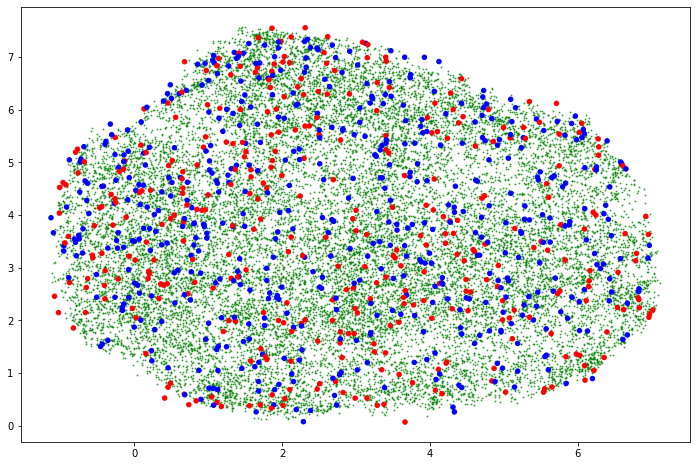

In [196]:
plt.figure(figsize=(12,8))
plt.scatter(umap_ukb[:,0], umap_ukb[:,1], s=1, c='green', alpha=0.6)
plt.scatter(umap_schiz[:,0], umap_schiz[:,1], s=20, c=colors, alpha=1)
plt.show()

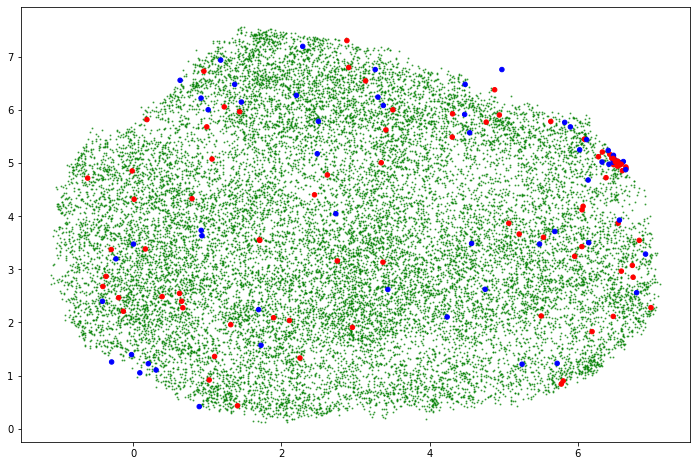

In [197]:
plt.figure(figsize=(12,8))
plt.scatter(umap_ukb[:,0], umap_ukb[:,1], s=1, c='green', alpha=0.6)
plt.scatter(umap_precatatoes[:,0], umap_precatatoes[:,1], s=20, c=colors_precatatoes, alpha=1)
plt.show()

In [198]:
precatatoes_labels = pd.read_csv(precatatoes_file, dtype={'participant_id':str})[["participant_id", "catatonie"]]
precatatoes_labels.set_index("participant_id", inplace=True)

In [199]:
precatatoes_labels.index

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '176', '178', '179', '180', '181', '182', '183', '184', '185', '186'],
      dtype='object', name='participant_id', length=162)

In [200]:
schiz_precatatoes.index

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       ...
       '175', '176', '178', '179', '181', '182', '183', '184', '185', '186'],
      dtype='object', length=150)

In [201]:
schiz_precatatoes_cat = pd.merge(precatatoes_labels, schiz_precatatoes, left_index=True, right_index=True)

In [202]:
schiz_precatatoes_cat = schiz_precatatoes_cat[schiz_precatatoes_cat.diagnosis=="schizophrenia"]

In [203]:
schiz_precatatoes_cat

,catatonie,sex,age,diagnosis,study,site,dim1,dim2,dim3,dim4,...,dim247,dim248,dim249,dim250,dim251,dim252,dim253,dim254,dim255,dim256
1,oui,M,63,schizophrenia,PreCatatoes,Sainte-Anne,-0.016111,0.011110,0.077433,0.132788,...,-0.054017,0.045524,-0.026923,0.045320,-0.024094,-0.058650,-0.037187,0.085751,0.083119,0.045980
2,oui,M,45,schizophrenia,PreCatatoes,Sainte-Anne,-0.035993,0.048053,0.074272,0.084912,...,-0.108843,0.017702,-0.058217,0.078146,-0.037131,-0.030019,-0.017687,0.085213,0.099371,0.031396
3,non,M,26,schizophrenia,PreCatatoes,Sainte-Anne,-0.027526,0.029484,0.035861,0.171160,...,-0.086817,0.024797,0.009410,0.060554,-0.066893,-0.050408,-0.049560,0.080684,0.082292,0.039722
4,non,F,68,schizophrenia,PreCatatoes,Sainte-Anne,-0.034837,0.043590,0.079360,0.084169,...,-0.109005,0.013705,-0.064748,0.078610,-0.034349,-0.030063,-0.016744,0.081425,0.091628,0.035653
5,oui,F,48,schizophrenia,PreCatatoes,Sainte-Anne,-0.035993,0.048053,0.074272,0.084912,...,-0.108843,0.017702,-0.058217,0.078146,-0.037131,-0.030019,-0.017687,0.085213,0.099371,0.031396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,non,M,57,schizophrenia,PreCatatoes,Sainte-Anne,-0.010711,0.013806,0.075747,0.030696,...,-0.052258,0.085069,-0.070021,0.125983,-0.083172,0.017646,-0.005790,0.059713,-0.015249,0.057875
182,non,M,53,schizophrenia,PreCatatoes,Sainte-Anne,-0.046358,0.032577,0.059999,0.091483,...,-0.071366,0.021754,-0.050242,0.121720,-0.056239,-0.079278,-0.059720,0.076895,0.107339,-0.018375
183,non,F,19,schizophrenia,PreCatatoes,Sainte-Anne,0.026746,-0.032428,0.162254,-0.101224,...,0.032241,0.057583,-0.057798,0.029797,0.045761,-0.000252,0.031521,-0.058201,-0.024902,0.021486
185,oui,M,29,schizophrenia,PreCatatoes,Sainte-Anne,-0.016880,-0.011572,0.123678,0.046821,...,-0.051431,0.088001,-0.012732,0.039971,-0.068373,-0.017076,-0.025961,0.022981,-0.051274,0.105834


In [204]:
cmap = {'non':'b', 'oui':'r'}
colors_catatonie = [cmap[diag] for diag in schiz_precatatoes_cat.catatonie]

In [205]:
umap_cat = reducer.transform(schiz_precatatoes_cat.iloc[:, 6:])

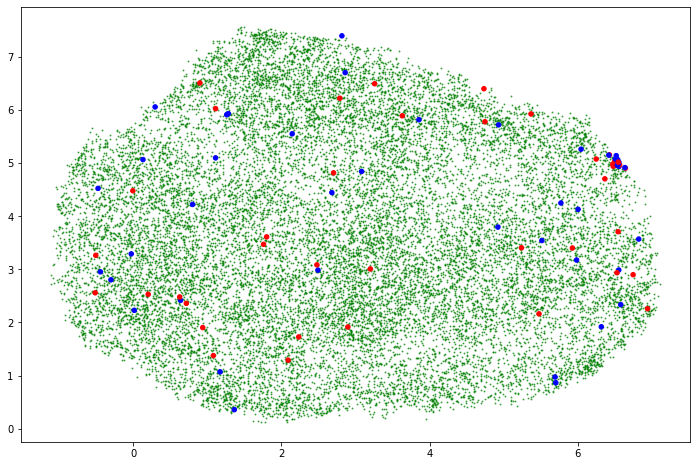

In [206]:
plt.figure(figsize=(12,8))
plt.scatter(umap_ukb[:,0], umap_ukb[:,1], s=1, c='green', alpha=0.6)
plt.scatter(umap_cat[:,0], umap_cat[:,1], s=20, c=colors_catatonie, alpha=1)
plt.show()

In [207]:
reducer_cat = UMAP()
umap_cat2 = reducer_cat.fit_transform(schiz_precatatoes_cat.iloc[:, 6:])

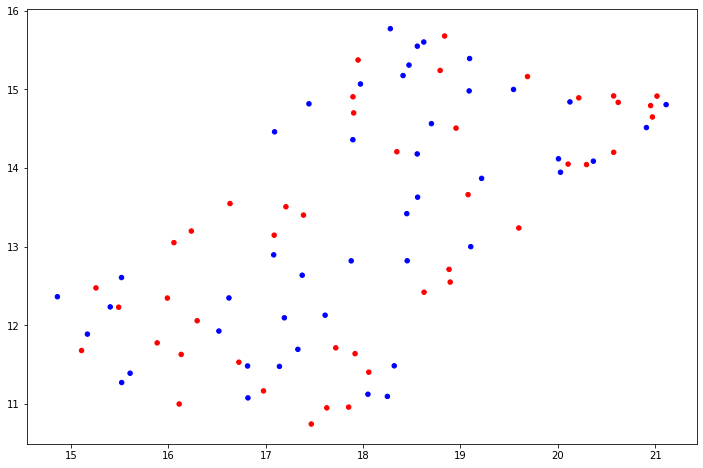

In [208]:
plt.figure(figsize=(12,8))
plt.scatter(umap_cat2[:,0], umap_cat2[:,1], s=20, c=colors_catatonie, alpha=1)
plt.show()